In [26]:
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt

In [27]:
image = tif.imread('/home/tli_project/Desktop/Data/T4/neurons/SubtypeA/211114_P36_N2/211114_P36_N2_FlipV_R277_JE_mask.tif')
mask = tif.imread('/home/tli_project/Desktop/Data/T4/neurons/SubtypeA/output/stable_211114_P36_N2.tif')
# image[mask==0]=0
# mask[mask!=0] = 1


In [28]:
image[image!=0] = 1
mask[mask!=0] = 1
image = image.sum(axis=1)
mask = mask.sum(axis=1)
image[image!=0] = 1
mask[mask!=0] = 1
mask.shape, image[4:].shape

((93, 500, 500), (85, 500, 500))

In [29]:
image = image[4:]
image = image - mask

In [30]:
image.shape, image.max()

((89, 500, 500), 1)

In [36]:
image = image.astype('uint8')
tif.imsave('/home/tli_project/Desktop/Data/T4/neurons/SubtypeA/output/transient2_211114_P36_N2.tif',image)

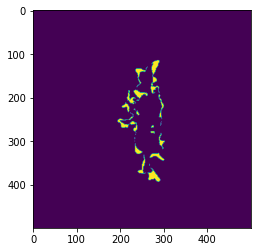

In [35]:
plt.imshow(image[50])

In [9]:
# image_4d = np.concatenate((mask,image))

In [11]:
# save_file = '/home/tli_project/Desktop/Data/T4/neurons/SubtypeC_D/211114_P36_N3/new.tif'
# tif.imwrite(save_file, image_4d, imagej=True, resolution=(1./0.076, 1./0.076),
#                 metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

In [47]:
img_2D = mask.sum(axis=1)
img_2D[img_2D!=0] = 1

In [48]:
img_2D.shape

(85, 400, 400)

In [49]:
y = []
x = []
for t, st in enumerate(img_2D):
    points = np.argwhere(st)
    try:
        y.append(points[:,-2].max() - points[:,-2].min())
        x.append(points[:,-1].max() - points[:,-1].min())
    except:
        pass
result = np.array(x)/np.array(y)

In [50]:
result

array([0.51941748, 0.59459459, 0.60674157, 0.63235294, 0.7027027 ,
       0.66326531, 0.57727273, 0.59278351, 0.605     , 0.58      ,
       0.51707317, 0.63819095, 0.59734513, 0.80113636, 0.66995074,
       0.5       , 0.58857143, 0.65697674, 0.66871166, 0.7615894 ,
       0.72988506, 0.66666667, 0.67204301, 0.62130178, 0.60512821,
       0.6627907 , 0.79754601, 0.79310345, 0.84827586, 0.77297297,
       1.01324503, 0.90804598, 0.93037975, 0.84713376, 0.91719745,
       0.77018634, 0.7357513 , 0.76282051, 0.92073171, 0.8516129 ,
       0.73369565, 0.72      , 0.76315789, 0.71122995, 0.625     ,
       0.65296804, 0.65333333, 0.73762376, 0.59166667, 0.64573991,
       0.79816514, 0.77319588, 0.74      , 0.80099502, 0.70720721,
       0.64016736, 0.67105263, 0.63090129, 0.64853556, 0.66935484,
       0.6328125 , 0.67420814, 0.73333333, 0.69298246, 0.66949153,
       0.75454545, 0.75336323, 0.73819742, 0.59448819, 0.6302521 ,
       0.62248996, 0.64      , 0.68674699, 0.63333333, 0.59215

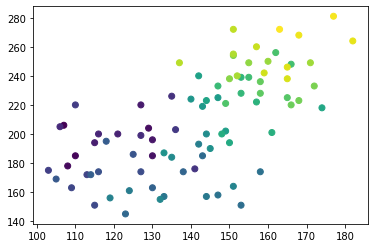

In [51]:
plt.scatter(x,y, c=np.arange(len(x)))

In [52]:
import cv2
def find_ellipses(img): #img is grayscale image of what I want to fit
        # ret,thresh = cv2.threshold(img,127,255,0)
        # _,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        _,contours,hierarchy = cv2.findContours(img, 1, 2,3)
        if len(contours) != 0:
            for cont in contours:
                if len(cont) < 5:
                    break
                elps = cv2.fitEllipse(cont)
                return elps  #only returns one ellipse for now
        return None

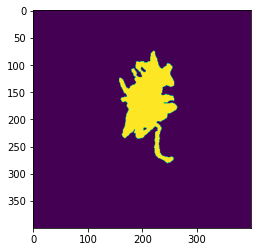

In [53]:
plt.imshow(img_2D[10])

In [54]:
test = img_2D[10]
test = test.astype('uint8')
elli = find_ellipses(test)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'findContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Input argument doesn't provide sequence protocol
>  - Can't parse 'contours'. Input argument doesn't provide sequence protocol


In [8]:
import cv2

moments = cv2.moments(cnt)
ellipse = cv2.fitEllipse(cnt)
rect = cv2.minAreaRect(cnt)
box = cv2.cv.BoxPoints(rect)
box = np.int0(box)
cv2.drawContours(im,[box],0,(0,0,255),2)
cv2.ellipse(im,ellipse,(0,255,0),2)

In [55]:
result = []
for t, st in enumerate(img_2D[1:]):
    points = st - img_2D[t]
    points[points<0] = 0
    points = np.argwhere(points)
    result.append(points[:,-2].mean())


In [56]:
result1 = []
for t, st in enumerate(img_2D[1:]):
    points = st - img_2D[t]
    points[points<0] = 0
    points = np.argwhere(points)
    result1.append(points[:,-1].mean())

In [64]:

img_PC = np.argwhere(img_2D)

In [65]:
points = img_PC[img_PC[:,0]==10][:,1:]
points[:10]

array([[ 75, 220],
       [ 75, 221],
       [ 75, 222],
       [ 76, 219],
       [ 76, 220],
       [ 76, 221],
       [ 76, 222],
       [ 76, 223],
       [ 77, 218],
       [ 77, 219]])

In [66]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

hull = ConvexHull(points, qhull_options='Qc')

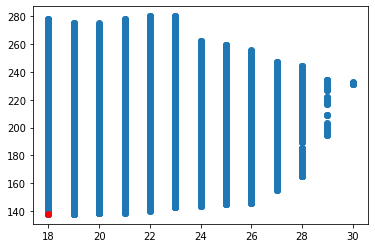

In [44]:
import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')

# for simplex in hull.simplices:

#     plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)

plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')

plt.show()

ValueError: Convex hull is not 2-D

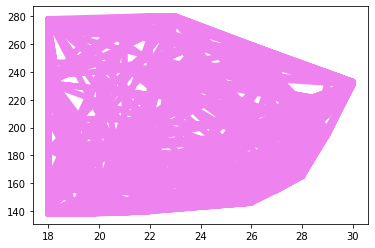

In [45]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for visible_facet in hull.simplices[hull.good]:

    ax.plot(hull.points[visible_facet, 0],

            hull.points[visible_facet, 1],

            color='violet',

            lw=6)

convex_hull_plot_2d(hull, ax=ax)

plt.show()

In [67]:
hull.max_bound

array([280., 264.])

In [68]:
hull.min_bound

array([ 75., 158.])

In [74]:
4*np.pi *(hull.volume/np.linalg.norm(hull.max_bound-hull.min_bound)**2)

3.872002180812384

In [48]:
image = tif.imread('/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/output/stable_211011_P37_N1.tif')

img_2D = image[-1].sum(axis=0)
img_2D.shape

(400, 400)

In [49]:
img_PC = np.argwhere(img_2D)

from scipy.spatial import ConvexHull, convex_hull_plot_2d

hull = ConvexHull(img_PC, qhull_options='Qc')

4*np.pi *hull.volume/(hull.area*hull.area)

0.8061603271197585

In [51]:
hull.volume, hull.area

(23488.500000000004, 605.0926292011328)

In [52]:
img_2D.sum()

148321

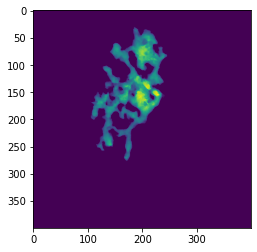

In [53]:
plt.imshow(img_2D)

In [54]:
img_2D.shape

(400, 400)

In [55]:
400*400


160000